# Layer Thickness Evolution in Laser Powder Bed Fusion (LPBF) Printing

## Introduction

This code simulates and visualizes the evolution of layer thickness in Laser Powder Bed Fusion (LPBF) printing processes. It's designed to help understand how layer thickness changes over multiple layers due to shrinkage effects, which is crucial for achieving dimensional accuracy in 3D printed parts.

### Key Features:

1. **Layer Thickness Calculation**: 
   - Implements a recursive function to calculate layer thickness for each layer, considering the nominal thickness and shrinkage factor.

2. **Convergence Analysis**: 
   - Determines the layer at which the thickness converges within a specified threshold.

3. **Parametric Study**:
   - Explores a range of shrinkage factors (0 to 0.6) to understand their impact on layer thickness evolution.

4. **Visualization**:
   - Generates a comprehensive plot showing:
     - Layer thickness evolution for different shrinkage factors
     - Steady-state thickness for each shrinkage factor
     - Convergence points marked on the curves
   - Includes annotations and a legend for clear interpretation

5. **Output**:
   - Saves the resulting plot as a PDF file for further analysis and reporting


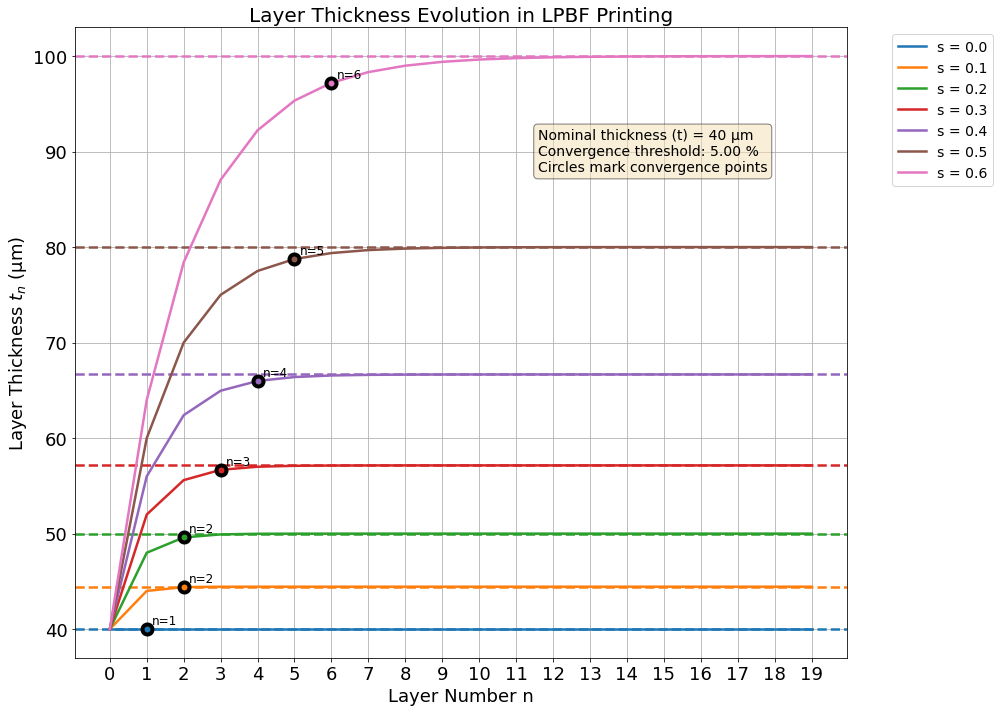

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def layer_thickness(n, t, s):
    """Calculate layer thickness for layer n"""
    if n == 0:
        return t
    else:
        return t + layer_thickness(n-1, t, s) * s

def find_convergence(t, s, n_layers, threshold):
    """Find the layer where convergence is reached"""
    prev_thickness = t
    for n in range(1, n_layers):
        current_thickness = layer_thickness(n, t, s)
        if abs(current_thickness - prev_thickness) < threshold:
            return n
        prev_thickness = current_thickness
    return n_layers  # If convergence is not reached

# Parameters
t = 40  # nominal layer thickness in µm
shrinkage_factors = np.arange(0, 0.7, 0.1)  # 0, 0.1, 0.2, ..., 0.6
n_layers = 20
percentage_convergence = 5
convergence_threshold = percentage_convergence/100 * t  

# Create the plot
plt.figure(figsize=(14, 10))

# Plot for each shrinkage factor
for s in shrinkage_factors:
    layers = np.arange(n_layers)
    thicknesses = np.array([layer_thickness(n, t, s) for n in layers])
    steady_state = t / (1 - s) if s != 1 else t

    convergence_layer = find_convergence(t, s, n_layers, convergence_threshold)

    line, = plt.plot(layers, thicknesses, '-', label=f's = {s:.1f}', linewidth=2.5)
    plt.axhline(y=steady_state, color=line.get_color(), linestyle='--', linewidth=2.5)

    # Mark convergence point
    if convergence_layer < n_layers:
        plt.plot(convergence_layer, thicknesses[convergence_layer], 'o', color=line.get_color(), 
               markersize=10, markeredgecolor='black', markeredgewidth=4)
        plt.annotate(f'n={convergence_layer}', 
                   (convergence_layer, thicknesses[convergence_layer]),
                   xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.xlabel('Layer Number n', fontsize=18)
plt.ylabel('Layer Thickness $t_n$ (µm)', fontsize=18)
plt.title('Layer Thickness Evolution in LPBF Printing', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)

# Set x-axis to show only integers
plt.xticks(np.arange(0, n_layers, 1), fontsize=18)
plt.yticks(fontsize=18)

# Add text box with nominal thickness and convergence explanation
textstr = (f'Nominal thickness (t) = {t} µm\n'
         f'Convergence threshold: {percentage_convergence:.2f} %\n'
         'Circles mark convergence points')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.6, 0.84, textstr, transform=plt.gca().transAxes, fontsize=14,
       verticalalignment='top', bbox=props)

plt.tight_layout()

# Save as PDF
plt.savefig('Figures/layer_thickness_evolution_with_convergence.pdf', format='pdf', bbox_inches='tight')
plt.show()